In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.datasets import fetch_california_housing
from ydata_profiling import ProfileReport
import seaborn as sns
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [3]:
data = fetch_california_housing(as_frame=True)
print(data.DESCR);

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
df = data.frame
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   8.325      41.0     6.984      1.024       322.0     2.556     37.88   
1   8.301      21.0     6.238      0.972      2401.0     2.110     37.86   
2   7.257      52.0     8.288      1.073       496.0     2.802     37.85   
3   5.643      52.0     5.817      1.073       558.0     2.548     37.85   
4   3.846      52.0     6.282      1.081       565.0     2.181     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [5]:
df.describe().T

count      mean       std      min      25%       50%  \
MedInc       20640.0     3.871     1.900    0.500    2.563     3.535   
HouseAge     20640.0    28.639    12.586    1.000   18.000    29.000   
AveRooms     20640.0     5.429     2.474    0.846    4.441     5.229   
AveBedrms    20640.0     1.097     0.474    0.333    1.006     1.049   
Population   20640.0  1425.477  1132.462    3.000  787.000  1166.000   
AveOccup     20640.0     3.071    10.386    0.692    2.430     2.818   
Latitude     20640.0    35.632     2.136   32.540   33.930    34.260   
Longitude    20640.0  -119.570     2.004 -124.350 -121.800  -118.490   
MedHouseVal  20640.0     2.069     1.154    0.150    1.196     1.797   

                  75%        max  
MedInc          4.743     15.000  
HouseAge       37.000     52.000  
AveRooms        6.052    141.909  
AveBedrms       1.100     34.067  
Population   1725.000  35682.000  
AveOccup        3.282   1243.333  
Latitude       37.710     41.950  
Longitude    -118.010   -114.310  
MedHouseVal     2.647      5.000

In [6]:
df.loc[df.AveOccup==df.AveOccup.max()]

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
19006  10.226      45.0     3.167      0.833      7460.0  1243.333     38.32   

       Longitude  MedHouseVal  
19006    -121.98        1.375

In [7]:
df.loc[df.AveRooms==df.AveRooms.max()]

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
1914   1.875      33.0   141.909     25.636        30.0     2.727     38.91   

      Longitude  MedHouseVal  
1914     -120.1          5.0

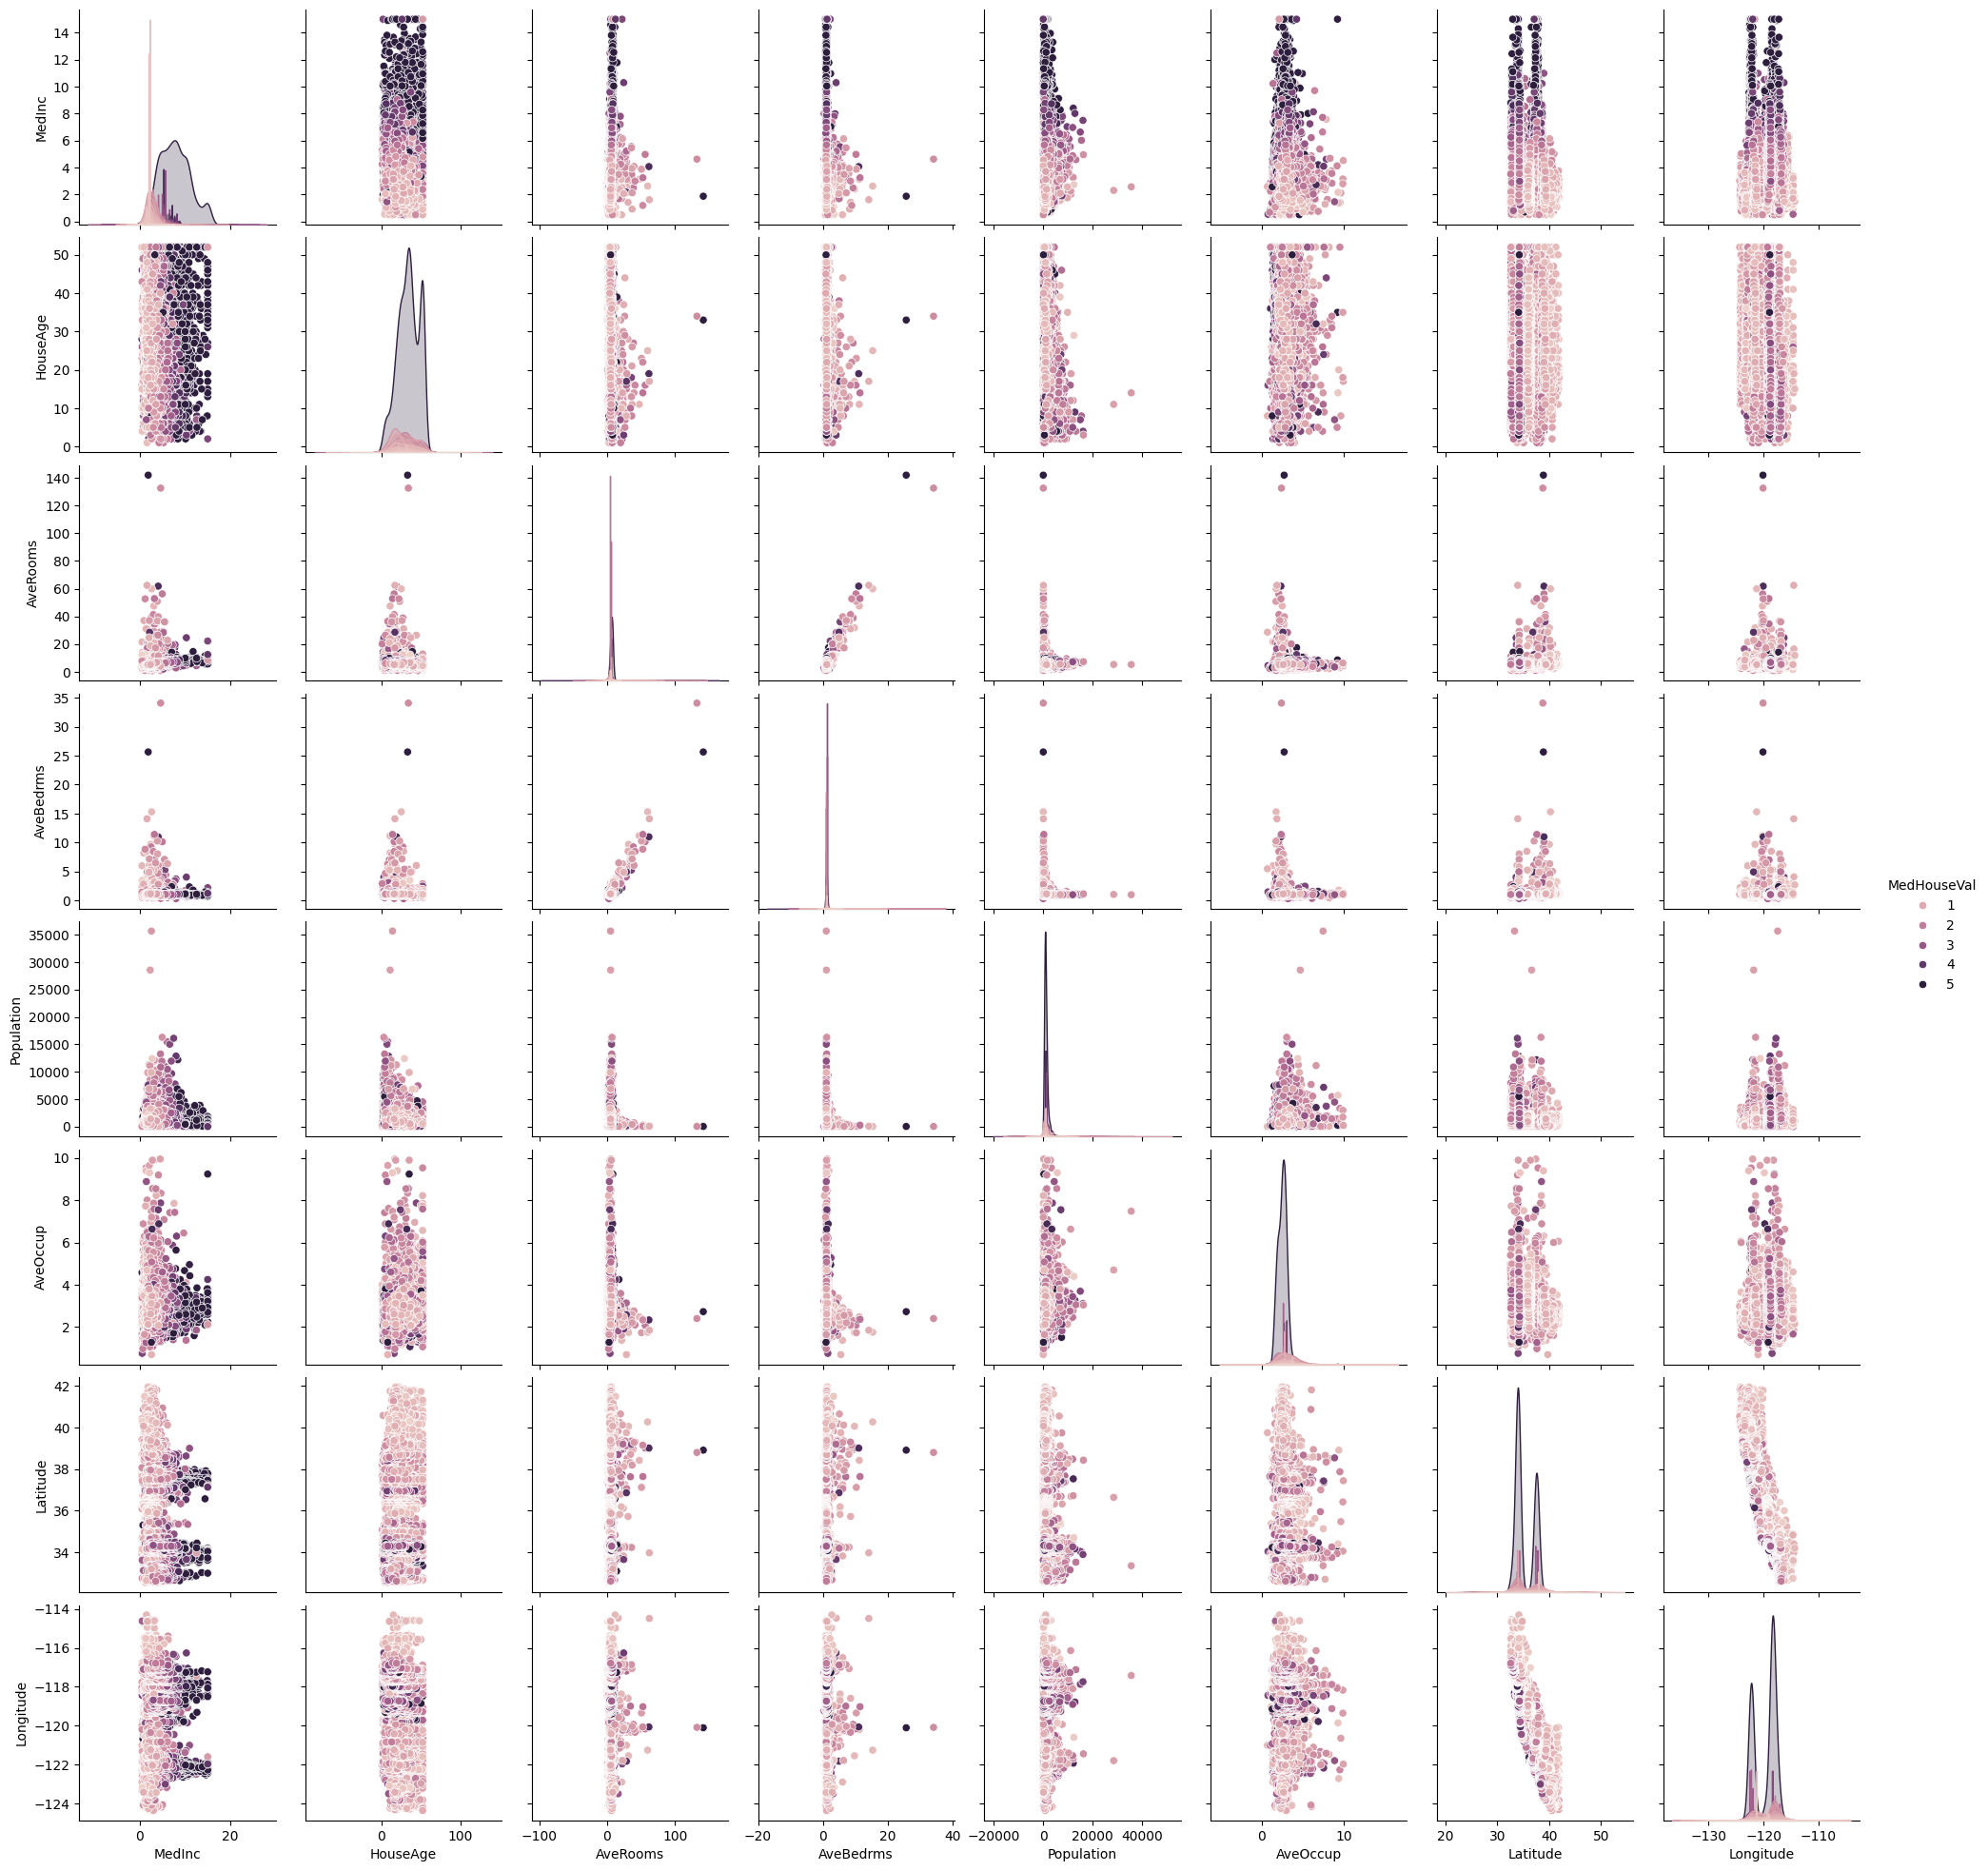

In [8]:
sns.pairplot(df.loc[df.AveOccup<10.0], hue='MedHouseVal');

In [9]:
profile = ProfileReport(df, title="Profiling Report", correlations = {"pearson" : {"calculate" : True} })
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
vif_data = pd.DataFrame() 
data_columns = list(df.columns)[:-1]
vif_data["feature"] = data_columns
vif_data["VIF"] = [variance_inflation_factor(df[data_columns], i) 
                          for i in range(len(data_columns))] 
vif_data

feature      VIF
0      MedInc   11.511
1    HouseAge    7.196
2    AveRooms   45.994
3   AveBedrms   43.590
4  Population    2.936
5    AveOccup    1.095
6    Latitude  559.874
7   Longitude  633.712